This file will process the raw data according to standard processing for RNA seq data. The different normalization methods considered were stored in https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6171491/.

In [2]:
import pandas as pd 
import numpy as np
import pygmnormalize as gmn
import seaborn as sns
import time

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df = pd.read_csv('raw_data.tsv', sep='\t', header=0)

In [4]:
df.head()

,Gene ID,Gene Name,SRR1782685,SRR1782686,SRR1782687,SRR1782688,SRR1782689,SRR1782690,SRR1782691,SRR1782692,...,SRR1782997,SRR1782998,SRR1782999,SRR1783000,SRR1783001,SRR1783002,SRR1783003,SRR1783004,SRR1783005,SRR1783006
0,ENSG00000000003,TSPAN6,469,107,807,458,173,159,187,223,...,767,371,288,628,580,411,711,697,792,454
1,ENSG00000000005,TNMD,7,0,11,0,0,2,4,0,...,9,3,0,3,6,0,3,0,6,0
2,ENSG00000000419,DPM1,238,199,288,220,260,97,108,122,...,381,333,200,376,235,159,643,342,341,297
3,ENSG00000000457,SCYL3,145,107,151,166,153,38,88,68,...,264,220,142,214,154,61,353,208,154,126
4,ENSG00000000460,C1orf112,35,43,22,39,37,18,25,21,...,84,58,38,56,59,23,114,56,33,24


In [5]:
len(list(df))

324

In [6]:
gene_ID = df['Gene ID']
gene_names = df['Gene Name']

In [7]:
df.drop('Gene ID', axis=1, inplace=True)
df.drop('Gene Name', axis=1, inplace=True)

In [8]:
df.head()

,SRR1782685,SRR1782686,SRR1782687,SRR1782688,SRR1782689,SRR1782690,SRR1782691,SRR1782692,SRR1782693,SRR1782694,...,SRR1782997,SRR1782998,SRR1782999,SRR1783000,SRR1783001,SRR1783002,SRR1783003,SRR1783004,SRR1783005,SRR1783006
0,469,107,807,458,173,159,187,223,251,182,...,767,371,288,628,580,411,711,697,792,454
1,7,0,11,0,0,2,4,0,1,0,...,9,3,0,3,6,0,3,0,6,0
2,238,199,288,220,260,97,108,122,116,100,...,381,333,200,376,235,159,643,342,341,297
3,145,107,151,166,153,38,88,68,70,85,...,264,220,142,214,154,61,353,208,154,126
4,35,43,22,39,37,18,25,21,12,17,...,84,58,38,56,59,23,114,56,33,24


In [9]:
normal_df = gmn.total_count_normalization(df)

In [10]:
normal_df

,SRR1782685,SRR1782686,SRR1782687,SRR1782688,SRR1782689,SRR1782690,SRR1782691,SRR1782692,SRR1782693,SRR1782694,...,SRR1782997,SRR1782998,SRR1782999,SRR1783000,SRR1783001,SRR1783002,SRR1783003,SRR1783004,SRR1783005,SRR1783006
0,5.064846e-05,1.390220e-05,0.000086,4.830331e-05,2.264291e-05,5.634691e-05,5.001545e-05,5.633922e-05,7.515083e-05,3.843979e-05,...,6.160122e-05,3.568170e-05,4.330241e-05,5.397875e-05,7.586702e-05,0.000078,3.859068e-05,5.708651e-05,8.075028e-05,5.118729e-05
1,7.559472e-07,0.000000e+00,0.000001,0.000000e+00,0.000000e+00,7.087662e-07,1.069849e-06,0.000000e+00,2.994057e-07,0.000000e+00,...,7.228305e-07,2.885313e-07,0.000000e+00,2.578603e-07,7.848312e-07,0.000000,1.628299e-07,0.000000e+00,6.117446e-07,0.000000e+00
2,2.570220e-05,2.585549e-05,0.000031,2.320247e-05,3.402981e-05,3.437516e-05,2.888593e-05,3.082236e-05,3.473106e-05,2.112076e-05,...,3.059982e-05,3.202697e-05,3.007112e-05,3.231849e-05,3.073922e-05,0.000030,3.489987e-05,2.801088e-05,3.476748e-05,3.348596e-05
3,1.565891e-05,1.390220e-05,0.000016,1.750731e-05,2.002523e-05,1.346656e-05,2.353668e-05,1.717967e-05,2.095840e-05,1.795265e-05,...,2.120303e-05,2.115896e-05,2.135049e-05,1.839403e-05,2.014400e-05,0.000012,1.915965e-05,1.703586e-05,1.570144e-05,1.420616e-05
4,3.779736e-06,5.586865e-06,0.000002,4.113164e-06,4.842703e-06,6.378896e-06,6.686557e-06,5.305487e-06,3.592868e-06,3.590530e-06,...,6.746418e-06,5.578271e-06,5.713512e-06,4.813392e-06,7.717507e-06,0.000004,6.187535e-06,4.586577e-06,3.364595e-06,2.705936e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65212,0.000000e+00,1.299271e-07,0.000000,6.327945e-07,1.308839e-07,0.000000e+00,5.349246e-07,0.000000e+00,2.994057e-07,2.112076e-07,...,1.606290e-07,0.000000e+00,1.503556e-07,0.000000e+00,2.616104e-07,0.000000,1.628299e-07,0.000000e+00,2.039149e-07,1.127473e-07
65213,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
65214,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
65215,0.000000e+00,0.000000e+00,0.000000,1.054658e-07,0.000000e+00,0.000000e+00,2.674623e-07,2.526423e-07,2.994057e-07,2.112076e-07,...,8.031450e-08,9.617709e-08,0.000000e+00,1.719069e-07,1.308052e-07,0.000000,5.427662e-08,8.190317e-08,0.000000e+00,0.000000e+00


In [113]:
gene_mapping = pd.read_csv('SmallHierarchicalMap_for_TreeFrame.csv')
gene_mapping = gene_mapping[list(gene_mapping)[2:-6]]
gene_mapping

,SRR1782685,SRR1782686,SRR1782687,SRR1782688,SRR1782689,SRR1782690,SRR1782691,SRR1782692,SRR1782693,SRR1782694,...,SRR1782997,SRR1782998,SRR1782999,SRR1783000,SRR1783001,SRR1783002,SRR1783003,SRR1783004,SRR1783005,SRR1783006
0,5.064846e-05,0.000014,8.582364e-05,0.000048,2.264291e-05,0.000056,0.000050,5.633922e-05,7.515083e-05,0.000038,...,6.160122e-05,3.568170e-05,4.330241e-05,5.397875e-05,7.586702e-05,0.000078,3.859068e-05,5.708651e-05,8.075028e-05,0.000051
1,9.827314e-05,0.000225,1.748377e-04,0.000089,1.891272e-04,0.000091,0.000185,7.452947e-05,8.533062e-05,0.000076,...,1.420763e-04,9.588855e-05,1.611812e-04,1.033160e-04,1.483331e-04,0.000085,1.135467e-04,1.103236e-04,1.155178e-04,0.000077
2,7.948245e-05,0.000067,7.657127e-05,0.000078,6.452575e-05,0.000073,0.000059,6.720284e-05,5.988114e-05,0.000076,...,6.609883e-05,5.635977e-05,5.608264e-05,5.879215e-05,7.024239e-05,0.000068,6.469774e-05,6.732440e-05,6.668016e-05,0.000090
3,2.159849e-07,0.000001,6.380940e-07,0.000000,5.235355e-07,0.000000,0.000002,2.526423e-07,5.988114e-07,0.000000,...,1.606290e-07,6.732396e-07,3.007112e-07,8.595343e-08,6.540260e-07,0.000000,3.256597e-07,1.638063e-07,4.078297e-07,0.000000
4,3.336967e-05,0.000077,5.264275e-05,0.000025,8.808484e-05,0.000062,0.000210,4.623353e-05,1.014985e-04,0.000016,...,9.340576e-05,1.828326e-04,8.013953e-05,8.509390e-05,1.162858e-04,0.000050,1.324350e-04,5.651319e-05,5.067284e-05,0.000030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,4.222505e-05,0.000005,3.945548e-05,0.000042,1.361192e-05,0.000034,0.000028,4.017012e-05,3.353344e-05,0.000035,...,3.694467e-05,2.423663e-05,3.367965e-05,3.988239e-05,4.368894e-05,0.000033,1.698858e-05,2.547189e-05,3.303421e-05,0.000025
1310,3.995721e-05,0.000127,8.805697e-05,0.000024,1.844154e-04,0.000053,0.000106,4.421240e-05,8.832468e-05,0.000022,...,2.547576e-04,7.828815e-05,3.292787e-05,3.996835e-05,9.365652e-05,0.000109,4.018098e-04,3.046798e-05,5.097871e-05,0.000028
1311,3.790535e-05,0.000030,2.999042e-05,0.000036,3.782544e-05,0.000052,0.000040,3.587520e-05,3.592868e-05,0.000039,...,4.208480e-05,3.250786e-05,5.277481e-05,3.799142e-05,4.015720e-05,0.000026,3.142616e-05,3.710213e-05,3.507336e-05,0.000027
1312,2.496786e-04,0.000230,2.253535e-04,0.000318,2.670031e-04,0.000296,0.000256,2.554213e-04,2.383269e-04,0.000308,...,2.976455e-04,2.529457e-04,2.801125e-04,2.752229e-04,2.529773e-04,0.000222,2.851151e-04,2.953428e-04,2.632541e-04,0.000273


In [126]:
gene_mapping2 = pd.read_csv('SmallHierarchicalMap_for_TreeFrame.csv')
names2 = list(gene_mapping2['GeneName'])
names2

['TSPAN6',
 'CFH',
 'FUCA2',
 'MPO',
 'ITGAL',
 'LAMP2',
 'ITGA2B',
 'PAFAH1B1',
 'CEACAM7',
 'CD9',
 'LTF',
 'ERP44',
 'CD44',
 'BTN3A1',
 'PRKCH',
 'HMGB3',
 'VCL',
 'CTNS',
 'RAB27B',
 'CAPG',
 'CP',
 'CHRDL2',
 'GNAI3',
 'CLDN18',
 'PKM',
 'RHOA',
 'ACTN1',
 'SCARB1',
 'RAB7A',
 'MCAM',
 'TM9SF3',
 'CAPZB',
 'FBLN1',
 'FAP',
 'SLC1A3',
 'CEACAM1',
 'RAB21',
 'PLOD1',
 'RAB10',
 'CD59',
 'CEACAM6',
 'DNM1L',
 'LYZ',
 'ITGA6',
 'SNAP23',
 'TSPAN15',
 'MAPK1',
 'MYH9',
 'MTHFD1',
 'MYL9',
 'TM9SF4',
 'MYL12A',
 'PGK1',
 'RAB11A',
 'EHD4',
 'CA2',
 'RAB2A',
 'CEACAM5',
 'ACTA2',
 'TSPAN14',
 'LGALS3BP',
 'CD81',
 'TCIRG1',
 'RAB5B',
 'GAPDH',
 'LDHB',
 'BTN3A3',
 'PTK7',
 'CD86',
 'GNAI2',
 'GNB4',
 'ACTR3',
 'EFEMP1',
 'FN1',
 'CAPZA1',
 'CD46',
 'TSPAN1',
 'GNA13',
 'TNFSF10',
 'COPA',
 'PRDX4',
 'TM9SF2',
 'VASP',
 'RAP1B',
 'MYO1B',
 'COPB1',
 'APOE',
 'PLVAP',
 'H3-3B',
 'ARF3',
 'COL4A2',
 'CD63',
 'DYSF',
 'GLUL',
 'ITM2C',
 'ITM2B',
 'LCP1',
 'IL1RN',
 'TLN1',
 'TLR2',
 'SDCBP'

### Trying to get genes of interest

In [11]:
patients = list(df)
len(patients)

322

In [12]:
X = normal_df.values

In [13]:
X.shape

(65217, 322)

In [14]:
## indices with all values as 0
idx = np.where(~X.any(axis=1))[0]

In [15]:
X[idx].shape

(10303, 322)

In [16]:
## indices where values are greater than zero
idx2 = np.where(X.any(axis=1))[0]
newX = X[idx2]
newX.shape

(54914, 322)

In [20]:
names = gene_names[idx2].values[rows]

In [61]:
np.where(X.any(axis=1))

(array([    0,     1,     2, ..., 65212, 65214, 65215]),)

In [70]:
vals = newerX.mean(axis=0)

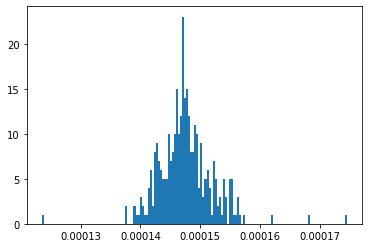

In [73]:
n, bins, patches = plt.hist(vals, bins=150)
plt.show()

In [89]:
## get rows where a value is greater than 0.0001
rows = np.unique(np.where(newX > 0.0001)[0])
newerX = newX[rows]
newerX.shape

(5637, 322)

In [90]:
names = gene_names[idx2].values[rows]

In [117]:
genes = gene_mapping.values
genes.shape

(1314, 322)

In [118]:
# by_patient = newerX.T
by_patient = genes.T
by_patient.shape

(322, 1314)

In [119]:
new_df = pd.DataFrame(by_patient, index=patients)

In [120]:
new_df

,0,1,2,3,4,5,6,7,8,9,...,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313
SRR1782685,0.000051,0.000098,0.000079,2.159849e-07,0.000033,0.000144,1.295909e-06,0.000169,2.041057e-05,0.000181,...,0.000093,0.000482,0.000053,0.000062,0.000036,0.000042,0.000040,0.000038,0.000250,0.000259
SRR1782686,0.000014,0.000225,0.000067,1.169344e-06,0.000077,0.000262,3.897813e-07,0.000132,3.897813e-07,0.000062,...,0.000327,0.000006,0.000029,0.000193,0.000025,0.000005,0.000127,0.000030,0.000230,0.000232
SRR1782687,0.000086,0.000175,0.000077,6.380940e-07,0.000053,0.000167,3.509517e-06,0.000132,6.976494e-05,0.000112,...,0.000163,0.000280,0.000034,0.000096,0.000018,0.000039,0.000088,0.000030,0.000225,0.000206
SRR1782688,0.000048,0.000089,0.000078,0.000000e+00,0.000025,0.000165,1.054658e-07,0.000178,1.054658e-07,0.000151,...,0.000045,0.000512,0.000017,0.000023,0.000014,0.000042,0.000024,0.000036,0.000318,0.000298
SRR1782689,0.000023,0.000189,0.000065,5.235355e-07,0.000088,0.000253,1.963258e-06,0.000155,7.853032e-07,0.000137,...,0.000197,0.000048,0.000023,0.000150,0.000016,0.000014,0.000184,0.000038,0.000267,0.000254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR1783002,0.000078,0.000085,0.000068,0.000000e+00,0.000050,0.000133,3.780417e-07,0.000133,3.213354e-06,0.000163,...,0.000070,0.000192,0.000017,0.000018,0.000017,0.000033,0.000109,0.000026,0.000222,0.000187
SRR1783003,0.000039,0.000114,0.000065,3.256597e-07,0.000132,0.000156,1.628299e-07,0.000156,1.297211e-05,0.000182,...,0.000097,0.000163,0.000012,0.000036,0.000016,0.000017,0.000402,0.000031,0.000285,0.000189
SRR1783004,0.000057,0.000110,0.000067,1.638063e-07,0.000057,0.000148,4.914190e-07,0.000176,2.293289e-06,0.000154,...,0.000064,0.000345,0.000017,0.000019,0.000015,0.000025,0.000030,0.000037,0.000295,0.000211
SRR1783005,0.000081,0.000116,0.000067,4.078297e-07,0.000051,0.000139,2.039149e-07,0.000143,3.160680e-06,0.000194,...,0.000132,0.000273,0.000019,0.000028,0.000014,0.000033,0.000051,0.000035,0.000263,0.000194


In [121]:
classes = open('classifications.txt', 'r').read()
classes = eval(classes)
classes.values()

dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [122]:
len(classes)

322

### PCA

In [127]:
## PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(by_patient)

In [128]:
pca_df = pd.DataFrame()
pca_df['pca-one'] = pca_result[:,0]
pca_df['pca-two'] = pca_result[:,1] 
pca_df['pca-three'] = pca_result[:,2]
pca_df['y'] = classes.values()
pca_df

,pca-one,pca-two,pca-three,y
0,-0.003171,0.009173,-0.007253,0
1,-0.022096,0.020863,0.009814,0
2,-0.008055,0.002797,-0.004623,0
3,0.007266,0.001901,0.000111,0
4,-0.008050,0.003948,0.005383,0
...,...,...,...,...
317,-0.001229,-0.004621,-0.002628,1
318,-0.002192,-0.003395,0.001957,1
319,0.006008,0.001223,0.000305,0
320,0.000963,-0.001440,-0.001875,0


In [129]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.32903259 0.1774065  0.12514406]


In [130]:
vals = np.arange(start=0, stop=322)

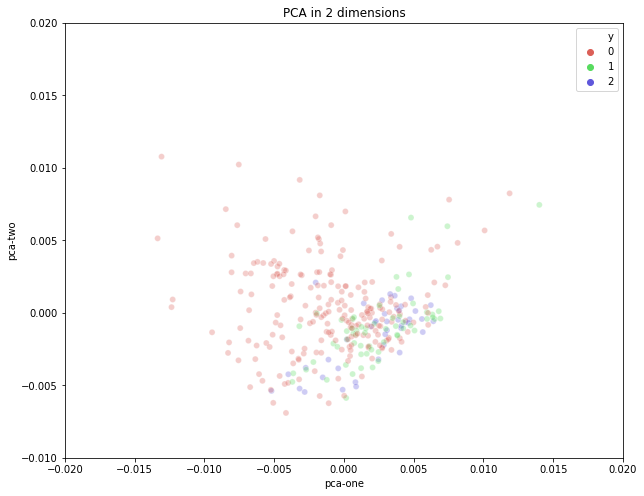

In [143]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 3),
    data=pca_df.loc[vals,:],
    legend="full",
    alpha=0.3
)
plt.title('PCA in 2 dimensions')
plt.xlim([-0.02, 0.02])
plt.ylim([-0.01, 0.02])
plt.show()

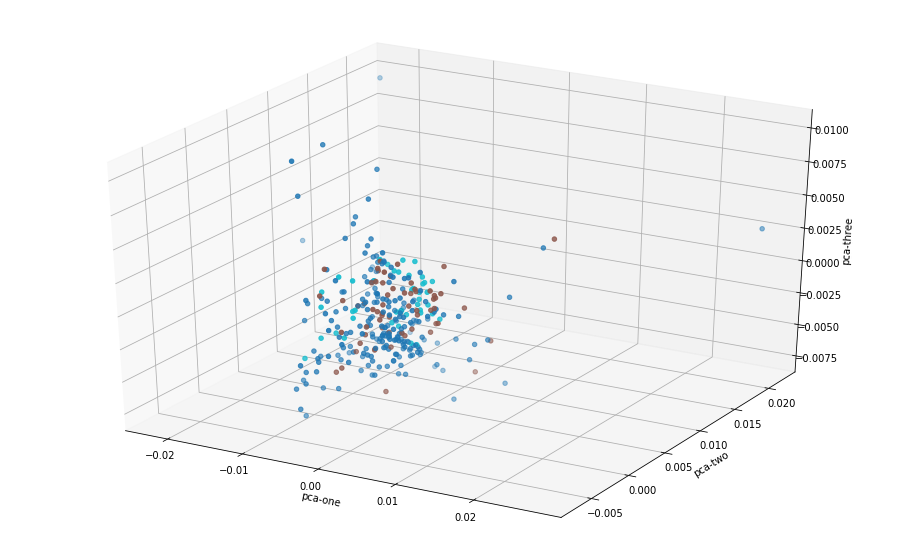

In [132]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=pca_df["pca-one"], 
    ys=pca_df["pca-two"], 
    zs=pca_df["pca-three"], 
    c=pca_df["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

### T-SNE

In [133]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(by_patient)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 322 samples in 0.010s...
[t-SNE] Computed neighbors for 322 samples in 0.203s...
[t-SNE] Computed conditional probabilities for sample 322 / 322
[t-SNE] Mean sigma: 0.002465
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.505154
[t-SNE] KL divergence after 1000 iterations: 0.799151
t-SNE done! Time elapsed: 1.2079811096191406 seconds


In [134]:
tsne_df = pd.DataFrame()
tsne_df['tsne-2d-one'] = tsne_results[:,0]
tsne_df['tsne-2d-two'] = tsne_results[:,1]
tsne_df['y'] = classes.values()

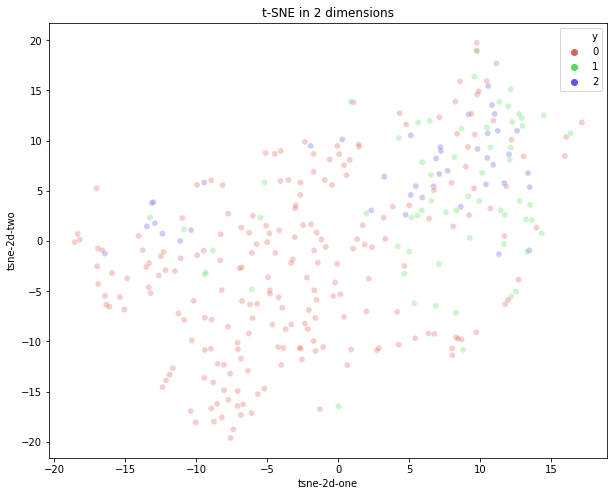

In [144]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 3),
    data=tsne_df,
    legend="full",
    alpha=0.3
)
plt.title('t-SNE in 2 dimensions')
plt.show()

## T-SNE by Gene

In [34]:
## get rows where a value is greater than 0.01
rows2 = np.unique(np.where(newX > 0.01)[0])
newerX2 = newX[rows2]
newerX2.shape

(46, 322)

In [35]:
names = gene_names[idx2].values[rows2]
names.shape

(46,)

In [36]:
gene_df = pd.DataFrame(newerX2)

In [37]:
gene_df.shape

(46, 322)

In [38]:
names.shape

(46,)

In [39]:
# gene_df['y'] = names

In [40]:
gene_df

,0,1,2,3,4,5,6,7,8,9,...,312,313,314,315,316,317,318,319,320,321
0,0.003993,0.004899,0.005207,0.002307,0.005163,0.004780,0.005046,0.003454,0.005579,0.003918,...,0.002889,0.003966,0.004076,0.002785,0.005269,0.003192,0.005007,0.002702,0.003571,0.003091
1,0.001475,0.000019,0.000611,0.012853,0.000030,0.000318,0.000047,0.004870,0.000492,0.011281,...,0.002110,0.001918,0.002770,0.003910,0.000987,0.001765,0.002058,0.005366,0.001563,0.002387
2,0.001253,0.000015,0.000369,0.002532,0.000014,0.000323,0.000016,0.001289,0.000828,0.011158,...,0.001201,0.001097,0.000827,0.001723,0.001524,0.003081,0.002336,0.004785,0.002201,0.001055
3,0.000361,0.005200,0.001305,0.000272,0.004539,0.000642,0.001366,0.000257,0.000534,0.000295,...,0.000393,0.000222,0.000682,0.000335,0.001020,0.000255,0.000266,0.000223,0.000412,0.000177
4,0.008744,0.000071,0.013645,0.000493,0.001441,0.002311,0.003780,0.001781,0.011472,0.001083,...,0.007907,0.000640,0.001132,0.007050,0.009411,0.015865,0.001709,0.002733,0.013214,0.001970
5,0.000183,0.000002,0.000238,0.002742,0.000018,0.000033,0.000003,0.001013,0.000087,0.003168,...,0.000847,0.000838,0.000390,0.000875,0.000278,0.001524,0.001907,0.002230,0.000521,0.001532
6,0.000019,0.001749,0.000285,0.000003,0.000515,0.000035,0.000029,0.000001,0.000039,0.000001,...,0.000012,0.000007,0.000036,0.000013,0.000105,0.000007,0.000007,0.000009,0.000013,0.000001
7,0.005492,0.006261,0.011283,0.001960,0.004385,0.005144,0.002527,0.002838,0.004392,0.001783,...,0.003423,0.000993,0.002859,0.002240,0.001675,0.001683,0.001540,0.001189,0.002648,0.002243
8,0.004350,0.000065,0.003618,0.011423,0.000161,0.002341,0.000657,0.011176,0.003362,0.010720,...,0.005542,0.004526,0.004984,0.008044,0.003259,0.009843,0.005112,0.011152,0.008354,0.016019
9,0.000877,0.000006,0.000794,0.000459,0.000083,0.000674,0.000154,0.000657,0.000459,0.000392,...,0.000447,0.000241,0.000348,0.000591,0.000422,0.000862,0.000399,0.000657,0.000585,0.000910


In [41]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(gene_df)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 45 nearest neighbors...
[t-SNE] Indexed 46 samples in 0.000s...
[t-SNE] Computed neighbors for 46 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 46 / 46
[t-SNE] Mean sigma: 0.064605
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.078926
[t-SNE] KL divergence after 300 iterations: 0.851746
t-SNE done! Time elapsed: 0.1571807861328125 seconds


In [42]:
gene_tsne_df = pd.DataFrame()
gene_tsne_df['tsne-2d-one'] = tsne_results[:,0]
gene_tsne_df['tsne-2d-two'] = tsne_results[:,1]
gene_tsne_df['y'] = names
gene_tsne_df

,tsne-2d-one,tsne-2d-two,y
0,-3.592297,-16.617701,ACTB
1,101.057747,-72.524841,APOB
2,19.432699,11.517969,APOA4
3,6.284374,-66.431023,SOD2
4,-18.585159,-47.519760,REG1A
5,8.936395,28.147177,APOA1
6,15.390747,-89.178238,IL1B
7,6.912923,-3.636978,JCHAIN
8,-81.957642,-23.168468,ALDOB
9,37.240425,25.388058,TFF3


In [43]:
names, len(names)

(array(['ACTB', 'APOB', 'APOA4', 'SOD2', 'REG1A', 'APOA1', 'IL1B',
        'JCHAIN', 'ALDOB', 'TFF3', 'PIGR', 'DEFA5', 'DEFA6', 'B2M',
        'ANPEP', 'COL3A1', 'REG3A', 'REG1B', 'MMP1', 'MT-ND6', 'MT-CO2',
        'MT-CYB', 'MT-ND2', 'MT-ND5', 'MT-CO1', 'MT-ND3', 'MT-ND4',
        'MT-ND1', 'MT-ATP6', 'MT-CO3', 'MT-RNR2', 'MT-TA', 'MT-TN',
        'MT-RNR1', 'IGKC', 'IGLC2', 'IGHA2', 'IGHG2', 'IGHA1', 'IGHG1',
        'IGHG3', 'IGHM', 'MT-ND4L', 'AC010970.1', nan, 'MT-ATP8'],
       dtype=object),
 46)

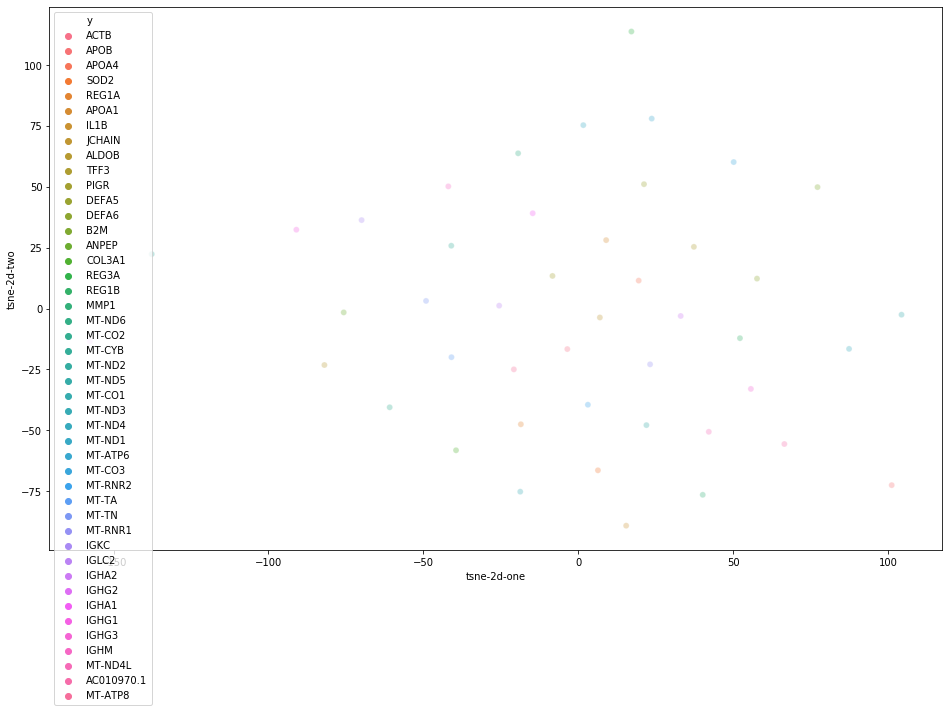

In [44]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
#     palette=sns.color_palette("hls", 437),
    data=gene_tsne_df,
    legend="full",
    alpha=0.3
)

In [277]:
len(set(names))

437